# 量化分析基础：价格数据与收益计算

**目的：** 学习获取股票价格数据，计算简单收益和对数收益，理解量化分析的基础数据处理流程。

**金融含义：** 价格数据是量化分析的起点，收益率是衡量投资表现的核心指标。掌握数据获取和收益计算是构建量化策略的第一步。


In [11]:
# 导入必要库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


## 数据获取

**目的：** 从 Yahoo Finance 获取 AAPL 股票的历史价格数据。

**金融含义：** 调整后收盘价已考虑分红、拆股等因素，是计算收益率的标准价格数据。这确保了收益率计算的准确性。


In [24]:
# 下载 AAPL 股票数据
try:
    data = yf.download('AAPL', start='2015-01-01', auto_adjust=True)
    px = data['Close'].copy()
    px.name = 'px'
    
    print(f"数据时间范围: {px.index[0].date()} 至 {px.index[-1].date()}")
    print(f"总样本数: {len(px)}")
    print("\n前5行数据:")
    print(px.head())
    print("\n后5行数据:")
    print(px.tail())
except Exception as e:
    print(f"数据获取失败: {e}，请检查网络连接")


[*********************100%***********************]  1 of 1 completed

数据时间范围: 2015-01-02 至 2025-09-09
总样本数: 2687

前5行数据:
Ticker           AAPL
Date                 
2015-01-02  24.261042
2015-01-05  23.577579
2015-01-06  23.579798
2015-01-07  23.910437
2015-01-08  24.829136

后5行数据:
Ticker            AAPL
Date                  
2025-09-03  238.470001
2025-09-04  239.779999
2025-09-05  239.690002
2025-09-08  237.880005
2025-09-09  234.350006


## 收益率计算

**目的：** 计算简单收益率和对数收益率，处理首行缺失值。

**金融含义：** 简单收益率直观易懂，对数收益率具有可加性且在小幅波动时近似相等。对数收益率更适合时间序列分析和风险建模。


In [28]:
# 计算收益率
ret = px.pct_change()  # 简单收益率: (P_t - P_{t-1}) / P_{t-1}
logret = np.log(px / px.shift(1))  # 对数收益率: ln(P_t / P_{t-1})

# 处理首行 NaN（第一天无前一日价格作比较）
print("首行 NaN 处理前:")
print(f"ret 缺失值数量: {ret.isna().sum()}")
print(f"logret 缺失值数量: {logret.isna().sum()}")

# 删除缺失值
ret = ret.dropna()
logret = logret.dropna()

print("\n处理后:")
print(f"ret 样本数: {len(ret)}")
print(f"logret 样本数: {len(logret)}")

ret_series = ret['AAPL']
logret_series = logret['AAPL']

# 收益率统计
print("\n收益率统计:")
print(f"简单收益率 - 均值: {ret_series.mean():.6f}, 标准差: {ret_series.std():.6f}")
print(f"对数收益率 - 均值: {logret_series.mean():.6f}, 标准差: {logret_series.std():.6f}")


首行 NaN 处理前:
ret 缺失值数量: Ticker
AAPL    1
dtype: int64
logret 缺失值数量: Ticker
AAPL    1
dtype: int64

处理后:
ret 样本数: 2686
logret 样本数: 2686

收益率统计:
简单收益率 - 均值: 0.001012, 标准差: 0.018310
对数收益率 - 均值: 0.000844, 标准差: 0.018293


### 简单收益率 vs 对数收益率

- **简单收益率**：直观反映投资回报，适合计算单期收益
- **对数收益率**：具有时间可加性，正态分布假设下更适合风险建模，小幅波动时两者近似相等


## 收益率分布分析

**目的：** 可视化对数收益率的分布特征。

**金融含义：** 收益率分布反映股票的风险特征，正态分布检验是许多风险模型的基础假设。分布的厚尾特征揭示极端事件的发生概率。


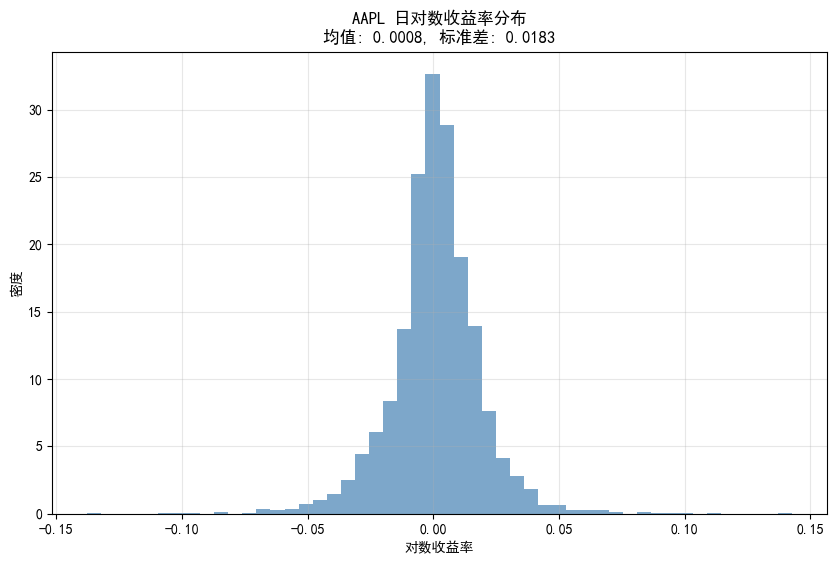

In [31]:
# 绘制对数收益率直方图
plt.figure(figsize=(10, 6))
plt.hist(logret_series, bins=50, alpha=0.7, color='steelblue', density=True)
plt.title(f'AAPL 日对数收益率分布\n均值: {logret_series.mean():.4f}, 标准差: {logret_series.std():.4f}')
plt.xlabel('对数收益率')
plt.ylabel('密度')
plt.grid(True, alpha=0.3)
plt.show()


## 累计净值曲线

**目的：** 展示投资的累计表现，模拟买入并持有策略的资产增长轨迹。

**金融含义：** 累计净值曲线直观显示投资的复利效应和时间价值。曲线的波动性反映投资风险，长期趋势体现资产的增值能力。


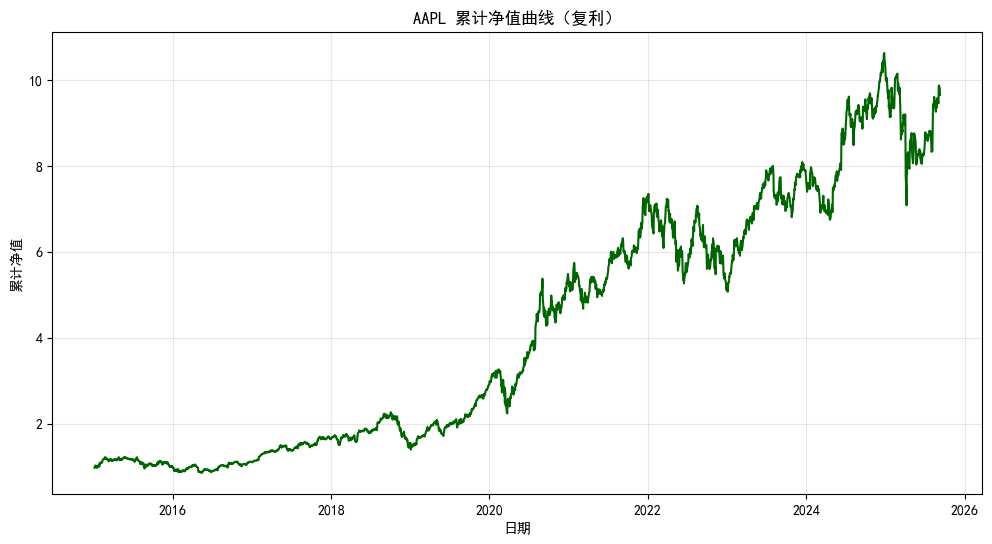

投资期间总收益率: 865.95%
最终净值: 9.66


In [33]:
# 计算累计净值（假设初始投资1元）
equity = (1 + ret_series).cumprod()

# 绘制累计净值曲线
plt.figure(figsize=(12, 6))
plt.plot(equity.index, equity.values, linewidth=1.5, color='darkgreen')
plt.title('AAPL 累计净值曲线（复利）')
plt.xlabel('日期')
plt.ylabel('累计净值')
plt.grid(True, alpha=0.3)
plt.show()

print(f"投资期间总收益率: {(equity.iloc[-1] - 1) * 100:.2f}%")
print(f"最终净值: {equity.iloc[-1]:.2f}")


## 数据汇总检查

**目的：** 验证数据处理结果，输出关键统计指标。

**金融含义：** 定期检查数据质量和计算结果是量化分析的良好习惯，确保后续分析建立在可靠的数据基础上。


In [35]:
# 汇总统计
print("=== 数据汇总 ===")
print(f"原始价格样本数: {len(px)}")
print(f"收益率样本数: {len(ret)}")
print(f"\n收益率统计:")
print(f"简单收益率 - 均值: {ret_series.mean():.6f}, 标准差: {ret_series.std():.6f}")
print(f"对数收益率 - 均值: {logret_series.mean():.6f}, 标准差: {logret_series.std():.6f}")
print(f"\n投资表现:")
print(f"期末累计净值: {equity.iloc[-1]:.4f}")
print(f"总收益率: {(equity.iloc[-1] - 1) * 100:.2f}%")
print(f"年化收益率: {((equity.iloc[-1]) ** (252/len(ret)) - 1) * 100:.2f}%")


=== 数据汇总 ===
原始价格样本数: 2687
收益率样本数: 2686

收益率统计:
简单收益率 - 均值: 0.001012, 标准差: 0.018310
对数收益率 - 均值: 0.000844, 标准差: 0.018293

投资表现:
期末累计净值: 9.6595
总收益率: 865.95%
年化收益率: 23.71%


## 今日要点总结

- **价格到收益转换**：使用 `pct_change()` 和对数变换计算收益率，注意处理首行缺失值
- **对数收益率优势**：具有时间可加性，便于多期分析，在风险建模中应用广泛
- **复利效应**：通过 `cumprod()` 计算累计净值，展示投资的时间价值和复合增长
- **向量化处理**：pandas 的向量化操作高效处理时间序列数据，避免循环提升性能
- **数据质量检查**：定期验证计算结果和统计指标，确保分析的可靠性
